In [2]:
import pandas as pd
from requests import get
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
ds = pd.read_csv("jb.csv", sep = ",", quotechar = '"', skipinitialspace = True).drop(columns = ["lyrics"]).reset_index().rename({'index': 'title1', 'title':'artist1', 'artist': 'lyrics'}, axis=1)

lyrics = ds.rename({'title1': 'title', 'artist1': 'artist'}, axis=1)

lyrics


,title,artist,lyrics
0,"Hey, Soul Sister",Train,Heyy He-e-e-e-ey He-e-e-e-ey [Verse 1] Your li...
1,Love The Way You Lie,Eminem,[Chorus: Rihanna] Just gonna stand there and w...
2,TiK ToK,Kesha,[Verse 1] Wake up in the morning feelin' like ...
3,Bad Romance,Lady Gaga,"[Intro] Oh-oh-oh-oh-oh, oh-oh-oh-oh, oh-oh-oh ..."
4,Just the Way You Are,Bruno Mars,"[Intro] Oh, oh-oh-oh Oh-oh-oh-oh Oh-oh-oh [Ver..."
...,...,...,...
290,Elastic Heart,Sia,"I won't give up, I won't give up I won't give ..."
291,Rather Be (feat. Jess Glynne),Clean Bandit,"Ooh, oh-oh [Verse 1: Jess Glynne] We're a thou..."
292,Hello,Adele,"Hello, it's me I was wondering if after all th..."
293,Dear Future Husband,Meghan Trainor,Dear future husband Here's a few things you'll...


In [4]:
songs = pd.read_csv("songs.csv")

songs

,index,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,url
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83,https://api.vagalume.com.br/search.php?art=Tra...
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82,https://api.vagalume.com.br/search.php?art=Emi...
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80,https://api.vagalume.com.br/search.php?art=Kes...
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79,https://api.vagalume.com.br/search.php?art=Lad...
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78,https://api.vagalume.com.br/search.php?art=Bru...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75,https://api.vagalume.com.br/search.php?art=Mar...
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75,https://api.vagalume.com.br/search.php?art=Ed%...
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70,https://api.vagalume.com.br/search.php?art=DJ%...
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69,https://api.vagalume.com.br/search.php?art=Mar...


In [5]:
#max duration and min duration

max_dur = songs['dur'].max()
display(max_dur)

min_dur = songs['dur'].min()
display(min_dur)

durations = songs[['title', 'dur']].sort_values(by='dur', ascending=False)
display(durations)

424

134

,title,dur
188,TKO,424
422,Wish That You Were Here,403
63,Monster,379
162,Lose Yourself to Dance,354
194,Take Back the Night,353
...,...,...
581,Good as Hell (feat. Ariana Grande) - Remix,159
492,Reality (feat. Janieck Devy) - Radio Edit,158
174,I Love It (feat. Charli XCX),157
591,All Around The World (La La La),148


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

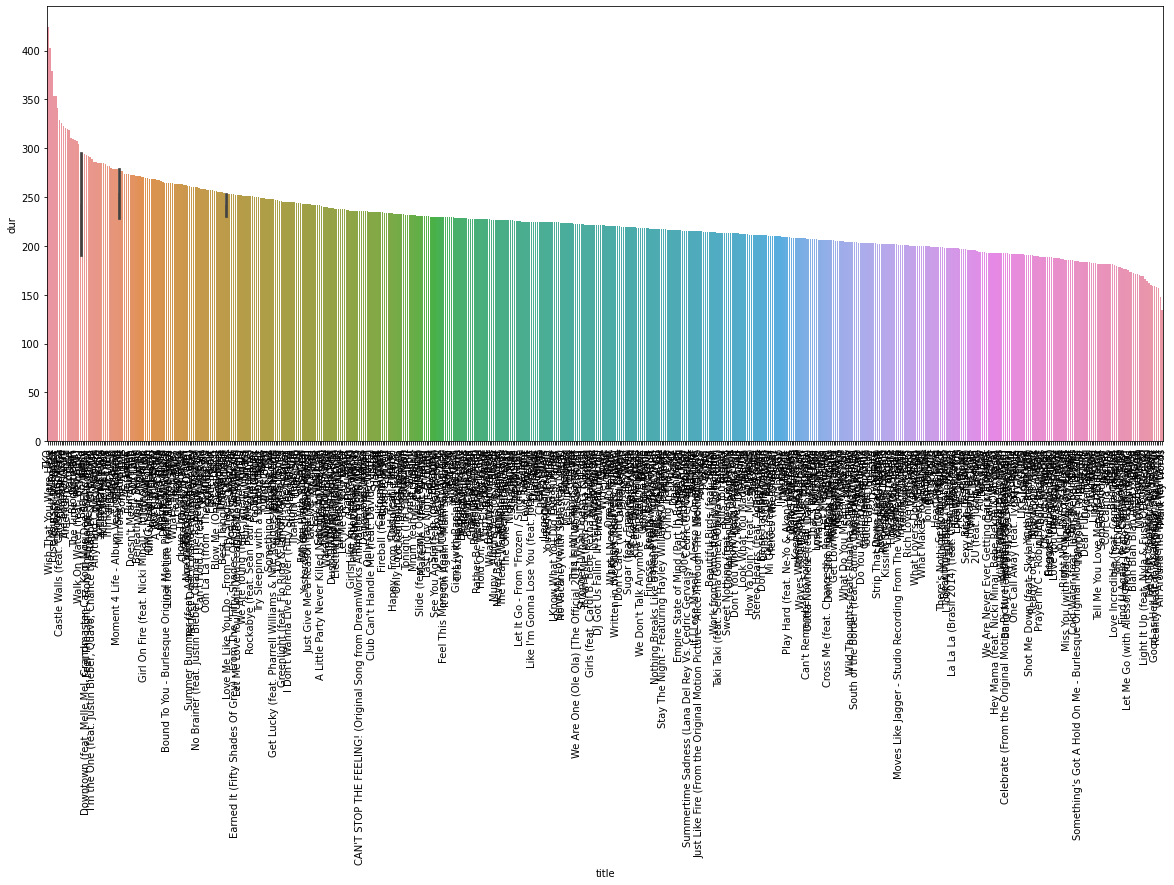

In [6]:
fig = plt.figure(figsize = (20, 8))
ax = sb.barplot(x = 'title', y = 'dur', data = durations)
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='dur', ylabel='Count'>

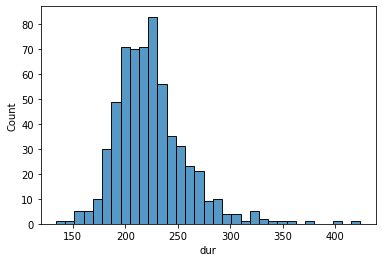

In [7]:
sb.histplot(data=durations, x = 'dur')

In [8]:
#max liveness and min liveness

max_dur = songs['live'].max()
display(max_dur)

min_dur = songs['live'].min()
display(min_dur)

livenesss = songs[['title', 'live']].sort_values(by='live', ascending=False)

74

0

<AxesSubplot:xlabel='live', ylabel='Count'>

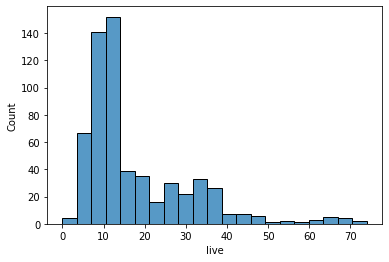

In [9]:
sb.histplot(data=livenesss, x = 'live')

In [10]:
#max energy and min energy

max_dur = songs['nrgy'].max()
display(max_dur)

min_dur = songs['nrgy'].min()
display(min_dur)

energys = songs[['title', 'nrgy']].sort_values(by='nrgy', ascending=False)

98

0

<AxesSubplot:xlabel='nrgy', ylabel='Count'>

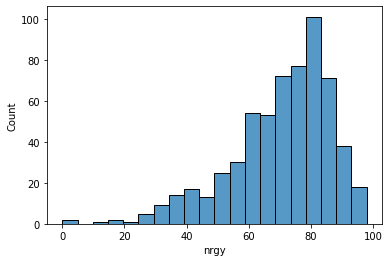

In [11]:
sb.histplot(data=energys, x = 'nrgy')

In [12]:
#max danceability and min danceability

max_dur = songs['dnce'].max()
display(max_dur)

min_dur = songs['dnce'].min()
display(min_dur)

dance = songs[['title', 'dnce']].sort_values(by='dnce', ascending=False)

97

0

<AxesSubplot:xlabel='dnce', ylabel='Count'>

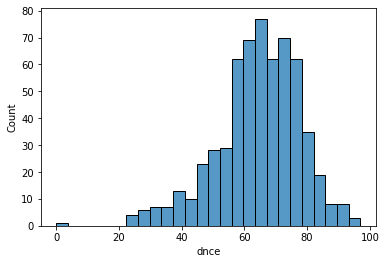

In [13]:
sb.histplot(data=dance, x = 'dnce')

In [14]:
display(songs[songs['dnce'] == 0])
print('-------------------------------------')
display(songs[songs['nrgy'] == 0])
print('-------------------------------------')
display(songs[songs['live'] == 0])
print('-------------------------------------')

,index,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,url
442,443,Million Years Ago,Adele,british soul,2016,0,0,0,-60,0,0,227,0,0,0,https://api.vagalume.com.br/search.php?art=Ade...


-------------------------------------


,index,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,url
442,443,Million Years Ago,Adele,british soul,2016,0,0,0,-60,0,0,227,0,0,0,https://api.vagalume.com.br/search.php?art=Ade...


-------------------------------------


,index,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,url
442,443,Million Years Ago,Adele,british soul,2016,0,0,0,-60,0,0,227,0,0,0,https://api.vagalume.com.br/search.php?art=Ade...


-------------------------------------


<h1>Dataset Cleaning<h1>

In [1]:
# 1 - Remove content between []
from re import sub
lyrics['lyrics'] = lyrics.apply(
    lambda row: sub(r'\[.*?\]', '', row['lyrics']),
    axis=1
)

NameError: name 'lyrics' is not defined

In [ ]:
# 2 - Remove all punctuation from lyrics except single quotes ('')
# and lowercase all words
import string

lyrics['lyrics'] = lyrics.apply(
    lambda row: row['lyrics'].translate(
        str.maketrans('', '', string.punctuation.replace("'", ""))
        ).lower(),
    axis=1
)

In [ ]:
# 3 - Tokenize
from nltk.tokenize import wordpunct_tokenize

lyrics['tokenized_lyrics'] = lyrics.apply(
    lambda row: wordpunct_tokenize(row['lyrics']), axis=1
)

In [ ]:
# 4 - Apply POS-tagging
from nltk.tag import pos_tag

lyrics['tagged_lyrics'] = lyrics.apply(
    lambda row: pos_tag(row['tokenized_lyrics'], tagset='universal'), axis=1
)

In [ ]:
# 5 - Lemmatize -> transform plurals to singular
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

lyrics['lemmatized_lyrics'] = lyrics.apply(
    lambda row: [
        lem.lemmatize(word)
        for word in row['tokenized_lyrics']
    ],
    axis=1
)